<a href="https://colab.research.google.com/github/benvictoria17/pandas/blob/master/whatsapp_chat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/Whatsapp_chat.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51575 entries, 0 to 51574
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  51575 non-null  int64 
 1   hours       51575 non-null  int64 
 2   days        51575 non-null  int64 
 3   months      51575 non-null  object
 4   names       51575 non-null  object
 5   timestamp   51575 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.4+ MB


In [10]:
df.columns = ['id', 'hours', 'days', 'months', 'names', 'timestamp']
# dropping unwanted column id and rearranging columns as needed
df.drop('id', axis=1)
df = df[['names', 'timestamp', 'hours', 'days', 'months']]
df.head()

,names,timestamp,hours,days,months
0,Person4,2020-05-19,1,19,May
1,Person3,2020-05-19,22,19,May
2,Person3,2020-05-19,22,19,May
3,Person1,2020-05-19,22,19,May
4,Person3,2020-05-19,22,19,May


In [11]:
df['names'].unique()

array(['Person4', 'Person3', 'Person1', 'Person2'], dtype=object)

In [12]:
df['dummy'] = pd.Series([1]*len(df))

In [13]:
df.groupby('names').count()["dummy"]

names
Person1    17543
Person2     3835
Person3    13514
Person4    16683
Name: dummy, dtype: int64

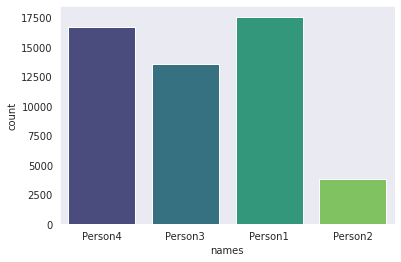

In [14]:
import seaborn as sns
sns.set_style('dark')
sns.countplot(x="names", data=df, palette="viridis")

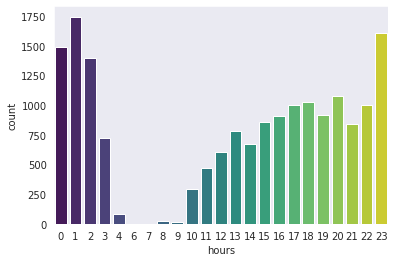

In [15]:
sns.countplot(x="hours", data=df[df["names"] == "Person1"], palette="viridis")

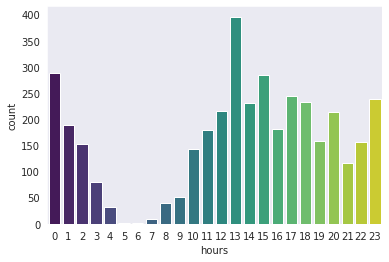

In [16]:
sns.countplot(x="hours", data=df[df["names"] == "Person2"], palette="viridis")

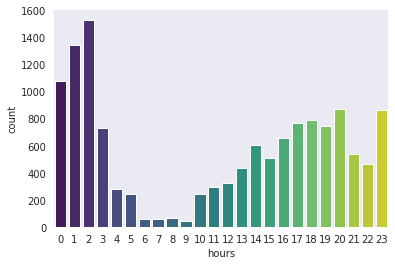

In [17]:
sns.countplot(x="hours", data=df[df["names"] == "Person3"], palette="viridis")

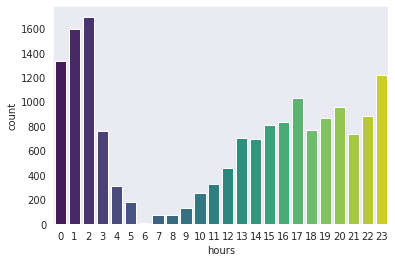

In [18]:
sns.countplot(x="hours", data=df[df["names"] == "Person4"], palette="viridis")

In [19]:
df["months"].unique()

array(['May', 'June', 'July', 'August'], dtype=object)

In [20]:
df.groupby("months").count()["dummy"]

months
August     7658
July      20824
June      19306
May        3787
Name: dummy, dtype: int64

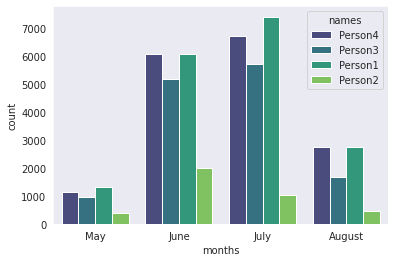

In [21]:
sns.countplot(x="months", data=df, hue="names", palette="viridis")

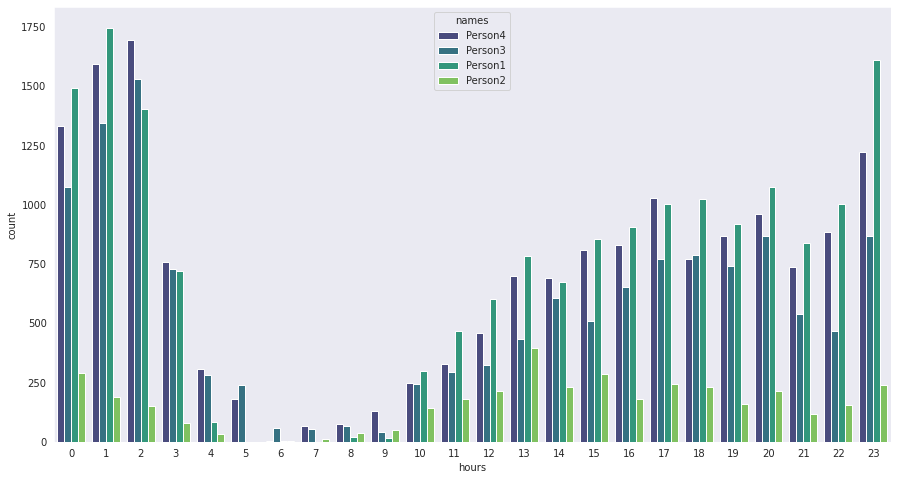

In [23]:
# let's check it against hours
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.countplot(x="hours", data=df, hue="names", palette="viridis")

# person2 uses whatsapp very often i believe
# and at morning 6'o clock only Person3 was active. What was he doing ????????